# CLIP encoder

https://github.com/openai/CLIP
```bash
pip install git+https://github.com/openai/CLIP.git
```

In [8]:
import clip
import torch
from PIL import Image

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14@336px", device=device)

In [32]:
def encode_image(path: str) -> np.ndarray:
    image = preprocess(Image.open(path)).unsqueeze(0).to(device)
    emb = model.encode_image(image).squeeze().detach().numpy().astype(np.float16)
    assert emb.shape == (768,)
    return emb

In [50]:
!wget -O dog.jpg https://dogtime.com/wp-content/uploads/sites/12/2023/09/GettyImages-164855910-1-e1694532950609.jpg

--2023-11-16 06:09:28--  https://dogtime.com/wp-content/uploads/sites/12/2023/09/GettyImages-164855910-1-e1694532950609.jpg
Resolving dogtime.com (dogtime.com)... 104.17.70.15, 104.17.69.15, 2606:4700::6811:450f, ...
Connecting to dogtime.com (dogtime.com)|104.17.70.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29204 (29K) [image/webp]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  28.52K  --.-KB/s    in 0s      

2023-11-16 06:09:28 (122 MB/s) - ‘dog.jpg’ saved [29204/29204]



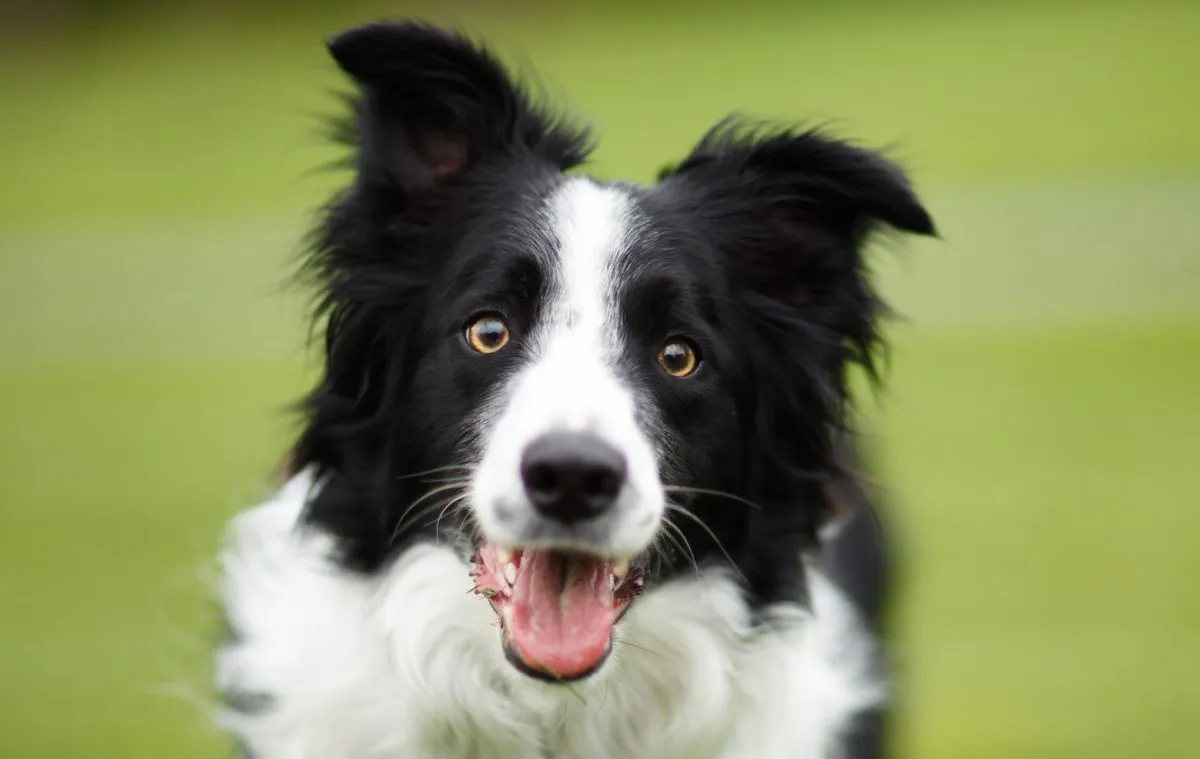

In [51]:
Image.open('dog.jpg')

In [55]:
%%time
emb = encode_image(path='dog.jpg')

CPU times: user 14.1 s, sys: 1.78 s, total: 15.9 s
Wall time: 583 ms


In [56]:
emb.shape

(768,)

In [57]:
emb[:5]

array([-0.2458, -0.256 ,  0.551 , -0.3235,  0.767 ], dtype=float16)